In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

## Importing train and test data
train = pd.read_csv('/Users/gabrielvictorgomesferreira/Desktop/DataCompetitions/TabularPlayground/train.csv')
test = pd.read_csv('/Users/gabrielvictorgomesferreira/Desktop/DataCompetitions/TabularPlayground/test.csv')

## Puting time in the right format 
train['time'] = pd.to_datetime(train['time'], format = '%Y-%m-%d %H:%M:%S')
test['time'] = pd.to_datetime(test['time'], format = '%Y-%m-%d %H:%M:%S')

train.head() 

,row_id,time,x,y,direction,congestion
0,0,1991-04-01,0,0,EB,70
1,1,1991-04-01,0,0,NB,49
2,2,1991-04-01,0,0,SB,24
3,3,1991-04-01,0,1,EB,18
4,4,1991-04-01,0,1,NB,60


In [2]:
test.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [3]:
test.shape

(2340, 5)

In [4]:
train.shape

(848835, 6)

In [5]:
train['direction'].value_counts()

SB    156708
EB    156708
NB    156708
WB    143649
SW     91413
NE     91413
NW     26118
SE     26118
Name: direction, dtype: int64

In [6]:
test['direction'].value_counts()

NB    432
EB    432
SB    432
WB    396
SW    252
NE    252
SE     72
NW     72
Name: direction, dtype: int64

In [7]:
## Extracting day, hour and minute
train['day'] = train['time'].dt.dayofweek
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute

test['day'] = test['time'].dt.dayofweek
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute

## Changing direction to dummies
train = pd.concat([train, pd.get_dummies(train['direction'])], axis = 1)
test = pd.concat([test, pd.get_dummies(test['direction'])], axis = 1)

In [8]:
out = train[(train['direction'] == 'EB') & (train['x'] == 0) & (train['y'] == 0)]
out.head(10)

,row_id,time,x,y,direction,congestion,day,hour,minute,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01 00:00:00,0,0,EB,70,0,0,0,1,0,0,0,0,0,0,0
65,65,1991-04-01 00:20:00,0,0,EB,70,0,0,20,1,0,0,0,0,0,0,0
130,130,1991-04-01 00:40:00,0,0,EB,70,0,0,40,1,0,0,0,0,0,0,0
195,195,1991-04-01 01:00:00,0,0,EB,70,0,1,0,1,0,0,0,0,0,0,0
260,260,1991-04-01 01:20:00,0,0,EB,70,0,1,20,1,0,0,0,0,0,0,0
325,325,1991-04-01 01:40:00,0,0,EB,70,0,1,40,1,0,0,0,0,0,0,0
390,390,1991-04-01 02:00:00,0,0,EB,70,0,2,0,1,0,0,0,0,0,0,0
455,455,1991-04-01 02:20:00,0,0,EB,70,0,2,20,1,0,0,0,0,0,0,0
520,520,1991-04-01 02:40:00,0,0,EB,70,0,2,40,1,0,0,0,0,0,0,0
585,585,1991-04-01 03:00:00,0,0,EB,70,0,3,0,1,0,0,0,0,0,0,0


In [9]:
out_test = test[(test['direction'] == 'EB') & (test['x'] == 0) & (test['y'] == 0)]
out_test.head(10)

,row_id,time,x,y,direction,day,hour,minute,EB,NB,NE,NW,SB,SE,SW,WB
0,848835,1991-09-30 12:00:00,0,0,EB,0,12,0,1,0,0,0,0,0,0,0
65,848900,1991-09-30 12:20:00,0,0,EB,0,12,20,1,0,0,0,0,0,0,0
130,848965,1991-09-30 12:40:00,0,0,EB,0,12,40,1,0,0,0,0,0,0,0
195,849030,1991-09-30 13:00:00,0,0,EB,0,13,0,1,0,0,0,0,0,0,0
260,849095,1991-09-30 13:20:00,0,0,EB,0,13,20,1,0,0,0,0,0,0,0
325,849160,1991-09-30 13:40:00,0,0,EB,0,13,40,1,0,0,0,0,0,0,0
390,849225,1991-09-30 14:00:00,0,0,EB,0,14,0,1,0,0,0,0,0,0,0
455,849290,1991-09-30 14:20:00,0,0,EB,0,14,20,1,0,0,0,0,0,0,0
520,849355,1991-09-30 14:40:00,0,0,EB,0,14,40,1,0,0,0,0,0,0,0
585,849420,1991-09-30 15:00:00,0,0,EB,0,15,0,1,0,0,0,0,0,0,0


In [10]:
out_test.shape

(36, 16)

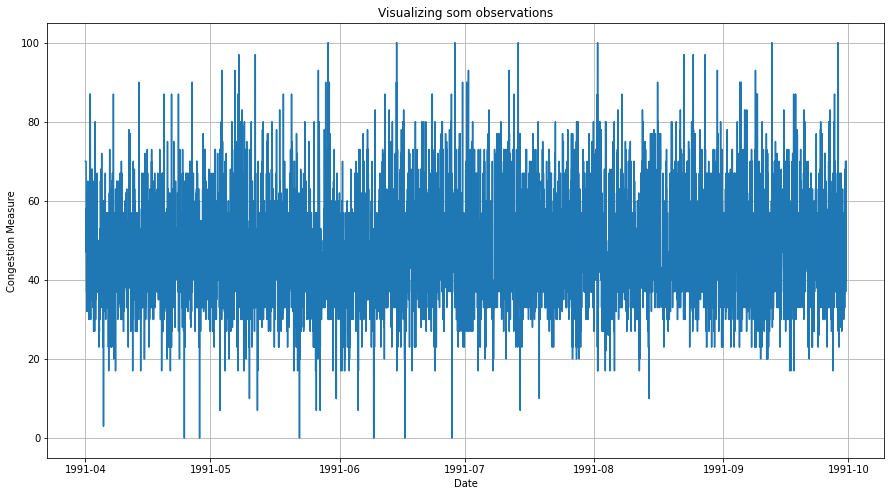

In [11]:
## Creating a new figure
plt.figure(figsize = (15, 8))

plt.plot(out['time'], out['congestion'])
plt.xlabel('Date')
plt.ylabel('Congestion Measure')
plt.title('Visualizing som observations')
plt.grid()
plt.show()

## Modeling

In [ ]:
train_data_sample = train[(train['direction'] == 'WB') & (train['x'] == 1) & (train['y'] == 0)].reset_index(drop = True)
test_data_sample = test[(test['direction'] == 'WB') & (test['x'] == 1) & (test['y'] == 0)].reset_index(drop = True)

In [13]:
## Splitting the data intro train & valudation 
X_train = train_data_sample.loc[0:13023, ['day', 'hour', 'minute']].reset_index(drop = True)
Y_train = train_data_sample.loc[0:13023, ['congestion']].reset_index(drop = True)

X_val = train_data_sample.loc[13023:13059, ['day', 'hour', 'minute']].reset_index(drop = True)
Y_val = train_data_sample.loc[13023:13059, ['congestion']].reset_index(drop = True)

In [14]:
## Building AdaBoost Model
ada_md = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 3), n_estimators = 500, learning_rate = 0.1).fit(X_train, Y_train)

## Predicting on the test 
ada_pred = ada_md.predict(X_val)

## Computing the mse
print(mean_squared_error(Y_val, ada_pred))

/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


130.74685213781802


In [15]:
data_out = train_data_sample.loc[13023:13059].reset_index(drop = True)
data_out['congestion_pred'] = ada_pred
# data_out.loc[:, ['congestion_pred']] = xgb_pred
data_out

,row_id,time,x,y,direction,congestion,day,hour,minute,EB,NB,NE,NW,SB,SE,SW,WB,congestion_pred
0,846517,1991-09-30 00:00:00,1,0,WB,39,0,0,0,0,0,0,0,0,0,0,1,36.657709
1,846582,1991-09-30 00:20:00,1,0,WB,39,0,0,20,0,0,0,0,0,0,0,1,36.657709
2,846647,1991-09-30 00:40:00,1,0,WB,37,0,0,40,0,0,0,0,0,0,0,1,36.657709
3,846712,1991-09-30 01:00:00,1,0,WB,37,0,1,0,0,0,0,0,0,0,0,1,36.657709
4,846777,1991-09-30 01:20:00,1,0,WB,37,0,1,20,0,0,0,0,0,0,0,1,36.657709
5,846842,1991-09-30 01:40:00,1,0,WB,37,0,1,40,0,0,0,0,0,0,0,1,36.657709
6,846907,1991-09-30 02:00:00,1,0,WB,37,0,2,0,0,0,0,0,0,0,0,1,54.182750
7,846972,1991-09-30 02:20:00,1,0,WB,37,0,2,20,0,0,0,0,0,0,0,1,54.182750
8,847037,1991-09-30 02:40:00,1,0,WB,35,0,2,40,0,0,0,0,0,0,0,1,55.164524
9,847102,1991-09-30 03:00:00,1,0,WB,35,0,3,0,0,0,0,0,0,0,0,1,55.164524


In [16]:
ada_pred

array([36.65770901, 36.65770901, 36.65770901, 36.65770901, 36.65770901,
       36.65770901, 54.18275046, 54.18275046, 55.16452442, 55.16452442,
       55.16452442, 57.91332935, 55.16452442, 55.16452442, 57.10144928,
       37.07980187, 37.07980187, 37.18921032, 37.23405191, 37.23405191,
       37.23405191, 37.79474498, 37.79474498, 37.79474498, 38.22376874,
       38.22376874, 38.22376874, 38.22376874, 38.22376874, 38.22376874,
       38.88376754, 38.88376754, 38.9178618 , 39.92563151, 39.92563151,
       39.99410847])

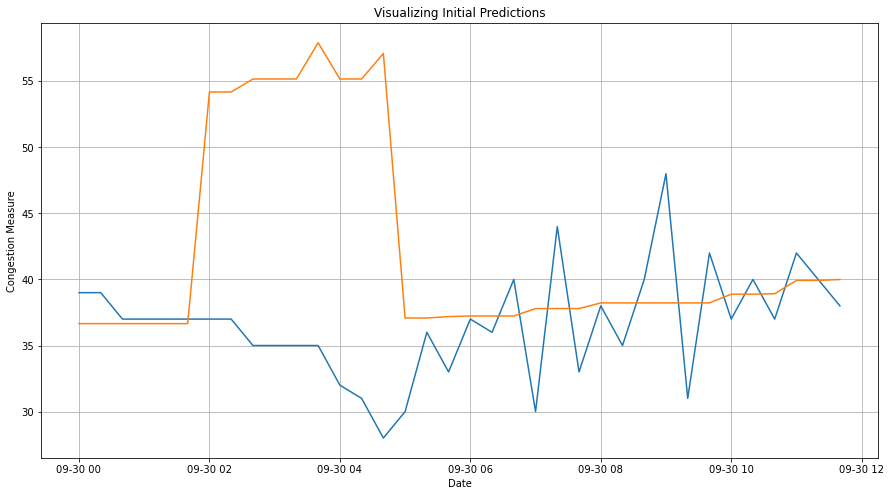

In [17]:
## Creating a new figure
plt.figure(figsize = (15, 8))

plt.plot(train_data_sample['time'][13023:13059], train_data_sample['congestion'][13023:13059])
plt.plot(train_data_sample['time'][13023:13059], ada_pred)
plt.xlabel('Date')
plt.ylabel('Congestion Measure')
plt.title('Visualizing Initial Predictions')
plt.grid()
plt.show()

In [21]:
## Defining the hyper-parameters for RF
Ada_param_grid = {'n_estimators': [100, 300, 500],
             'base_estimator__min_samples_split': [10, 15], 
             'base_estimator__min_samples_leaf': [5, 7], 
             'base_estimator__max_depth' : [3, 5, 7],
             'learning_rate': [0.001, 0.01, 0.1]}

## Running grid search with 3 fold
Ada_grid_search = GridSearchCV(AdaBoostRegressor(base_estimator = DecisionTreeRegressor()), Ada_param_grid, cv = 3, scoring = 'neg_mean_absolute_error', n_jobs = -1).fit(X_train, Y_train)

# Extracting the best model
ada_md = Ada_grid_search.best_estimator_

/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


14.027175580595982


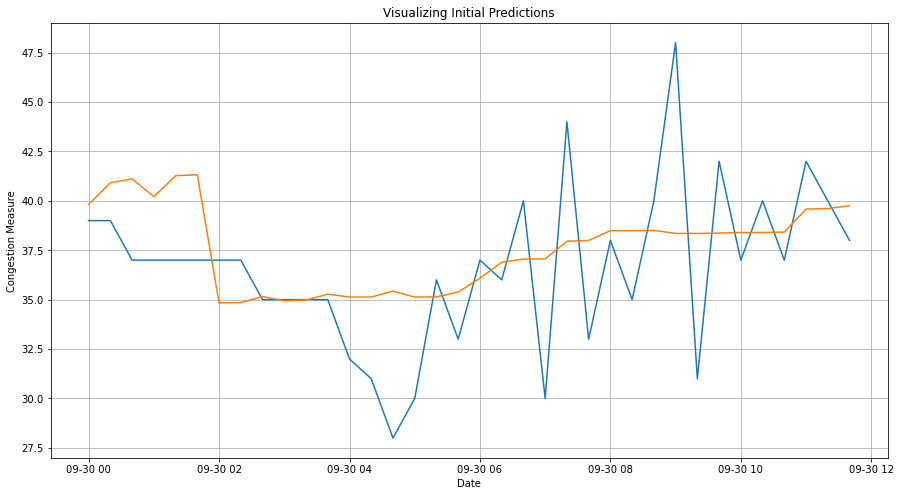

In [22]:
## Predicting on validation & test 
ada_val_pred = ada_md.predict(X_val)

## Computing the mse
print(mean_squared_error(Y_val, ada_val_pred))

## Creating a new figure
plt.figure(figsize = (15, 8))

plt.plot(train_data_sample['time'][13023:13059], train_data_sample['congestion'][13023:13059])
plt.plot(train_data_sample['time'][13023:13059], ada_val_pred)
plt.xlabel('Date')
plt.ylabel('Congestion Measure')
plt.title('Visualizing Initial Predictions')
plt.grid()
plt.show()

In [23]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


def main_ADA_all_directions(train, test):
    
    '''
    This function loops through all the directions and locations. 
    It takes two arguments:
    train: this is the train data-frame.
    test: this is the test data-frame.
    '''
    
    ## Defining all the directions
    directions = train['direction'].unique()
    
    ## Defining lists to store results
    results_all_directions_val = list()
    results_all_directions_test = list()
    
    for i in range(0, len(directions)):
        print('Working on direction:', directions[i])
        ## Subsetting train & test based on directions
        temp_train = train[train['direction'] == directions[i]].reset_index(drop = True)
        temp_test = test[test['direction'] == directions[i]].reset_index(drop = True)
        
        ## Appending results 
        results = main_ADA_all_directions_help(temp_train, temp_test)
        results_all_directions_val.append(results[0])
        results_all_directions_test.append(results[1])
            
    return [pd.concat(results_all_directions_val), pd.concat(results_all_directions_test)]
        
        
def main_ADA_all_directions_help(train, test):
    
    ## Defining lists to store results
    results_all_locations_val = list()
    results_all_locations_test = list()
    
    ## Defining locations 
    x_values = train['x'].unique()
    y_values = train['y'].unique()
    
    ## Defining list to store results
    results_all_locations = list()
    
    for i in range(0, len(x_values)):
        
        for j in range(0, len(y_values)):
            print('location: (',x_values[i],',',y_values[j],')')
            ## Subsetting train & test based on locaitons
            temp_train = train[(train['x'] == x_values[i]) & (train['y'] == y_values[j])].reset_index(drop = True)
            temp_test = test[(test['x'] == x_values[i]) & (test['y'] == y_values[j])].reset_index(drop = True)
            
            ## Sanity check
            if (temp_train.shape[0] == 0):
                
                continue
            
            ## Modeling building and prediction at location (x, y)
            results = main_ADA_all_directions_help_help(temp_train, temp_test)
            results_all_locations_val.append(results[0])
            results_all_locations_test.append(results[1])
            
    return [pd.concat(results_all_locations_val), pd.concat(results_all_locations_test)]
            

def main_ADA_all_directions_help_help(train, test):            
    
    ## Defining train, validation, and test datasets
    X_train = train.loc[0:13023, ['day', 'hour', 'minute']]
    Y_train = train.loc[0:13023, ['congestion']]

    X_val = train.loc[13023:13059, ['day', 'hour', 'minute']]
    Y_val = train.loc[13023:13059, ['congestion']]
    
    X_test = test[['day', 'hour', 'minute']]
    
    
    ## Defining the hyper-parameters for RF
    Ada_param_grid = {'n_estimators': [100, 300, 500],
                 'base_estimator__min_samples_split': [10, 15], 
                 'base_estimator__min_samples_leaf': [5, 7], 
                 'base_estimator__max_depth' : [3, 5, 7],
                 'learning_rate': [0.001, 0.01, 0.1]}

    ## Running grid search with 3 fold
    Ada_grid_search = GridSearchCV(AdaBoostRegressor(base_estimator = DecisionTreeRegressor()), Ada_param_grid, cv = 3, scoring = 'neg_mean_absolute_error', n_jobs = -1).fit(X_train, Y_train)

    # Extracting the best model
    ada_md = Ada_grid_search.best_estimator_


    ## Predicting on validation & test 
    ada_val_pred = ada_md.predict(X_val)
    ada_test_pred = ada_md.predict(X_test)
    
    ## Appending predictions on validation and test
    data_out = train.loc[13023:13059].reset_index(drop = True)
    data_out['congestion_pred'] = ada_val_pred
    test['congestion_pred'] = ada_test_pred

    
    return [data_out[['row_id', 'time', 'x', 'y', 'direction', 'congestion', 'congestion_pred']], test[['row_id', 'time', 'x', 'y', 'direction', 'congestion', 'congestion_pred']]]
     
    


In [24]:
## Modeling 
results = main_ADA_all_directions(train, test)

## Storing results
results[0].to_csv('results_validation.csv', index = False)
results[1].to_csv('results_test.csv', index = False)

Working on direction: EB
location: ( 0 , 0 )


/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyError: "['congestion'] not in index"